
1. Feature and data explanation

In this project we are going to analize factors, that contribute to heart diseases. The data was taken from UCI Machine Learning Repository from here

14 features have been used:

-- 1. (age)

-- 2. (sex) (1 = male; 0 = female)

-- 3. (cp) chest pain type

-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic   

-- 4. (trestbps) resting blood pressure (in mm Hg on admission to the hospital)

-- 5. (chol) serum cholestoral in mg/dl

-- 6. (fbs) (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

-- 7. (restecg) resting electrocardiographic results

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
            elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy
            by Estes' criteria

-- 8. (thalach) maximum heart rate achieved

-- 9. (exang) exercise induced angina (1 = yes; 0 = no)

-- 10. (oldpeak) = ST depression induced by exercise relative to rest

-- 11. (slope) the slope of the peak exercise ST segment

-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping  

-- 12. (ca) number of major vessels (0-3) colored by flourosopy

-- 13. (thal) 3 = normal; 6 = fixed defect; 7 = reversable defect

-- 14. (num) diagnosis of heart disease (angiographic disease status)

--  five diseases (0-4), where 0 - the most frequent


Let's import necessary modules, read data and divide features into numerical and categorical



In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [32]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/processed.cleveland.data', sep=",", header=None)
data.columns = ['age', 'sex', 'pain', 'restbp','chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
data.head()

,age,sex,pain,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



2. Primary data analysis

Let's dive into distribution of features


In [35]:
numer = ['age', 'restbp', 'chol', 'thalach', 'oldpeak']
categ = data.drop(columns=numer).columns.tolist()
categ

['sex', 'pain', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']

In [36]:
for i in categ:
    print(i)
    print(data[i].value_counts())
    print(10 * "-")

sex
1.0    206
0.0     97
Name: sex, dtype: int64
----------
pain
4.0    144
3.0     86
2.0     50
1.0     23
Name: pain, dtype: int64
----------
fbs
0.0    258
1.0     45
Name: fbs, dtype: int64
----------
restecg
0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64
----------
exang
0.0    204
1.0     99
Name: exang, dtype: int64
----------
slope
1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64
----------
ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
----------
thal
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64
----------
num
0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64
----------




here we have some missing values. Let's clean the data


In [37]:
data['ca'] = data['ca'].apply(lambda x: np.nan if str(x) == "?" else x)
data['thal'] = data['thal'].apply(lambda x: np.nan if str(x) == "?" else x)

In [38]:
data['ca'].fillna(0, inplace = True)
data['thal'].fillna(method='bfill', inplace = True)

In [39]:
data['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
0        4
Name: ca, dtype: int64

In [40]:
for i in categ:
    data[i] = data[i].astype("float64")

In [41]:
data.dtypes

age        float64
sex        float64
pain       float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca         float64
thal       float64
num        float64
dtype: object



Let's plot features.


Text(0.5, 1.0, 'Target distribution')

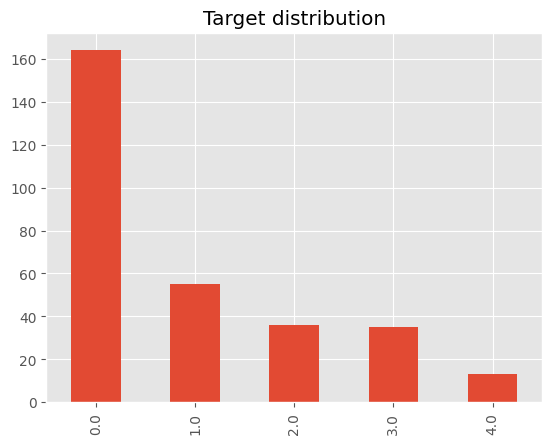

In [42]:
data["num"].value_counts().plot(kind="bar")

plt.title("Target distribution")

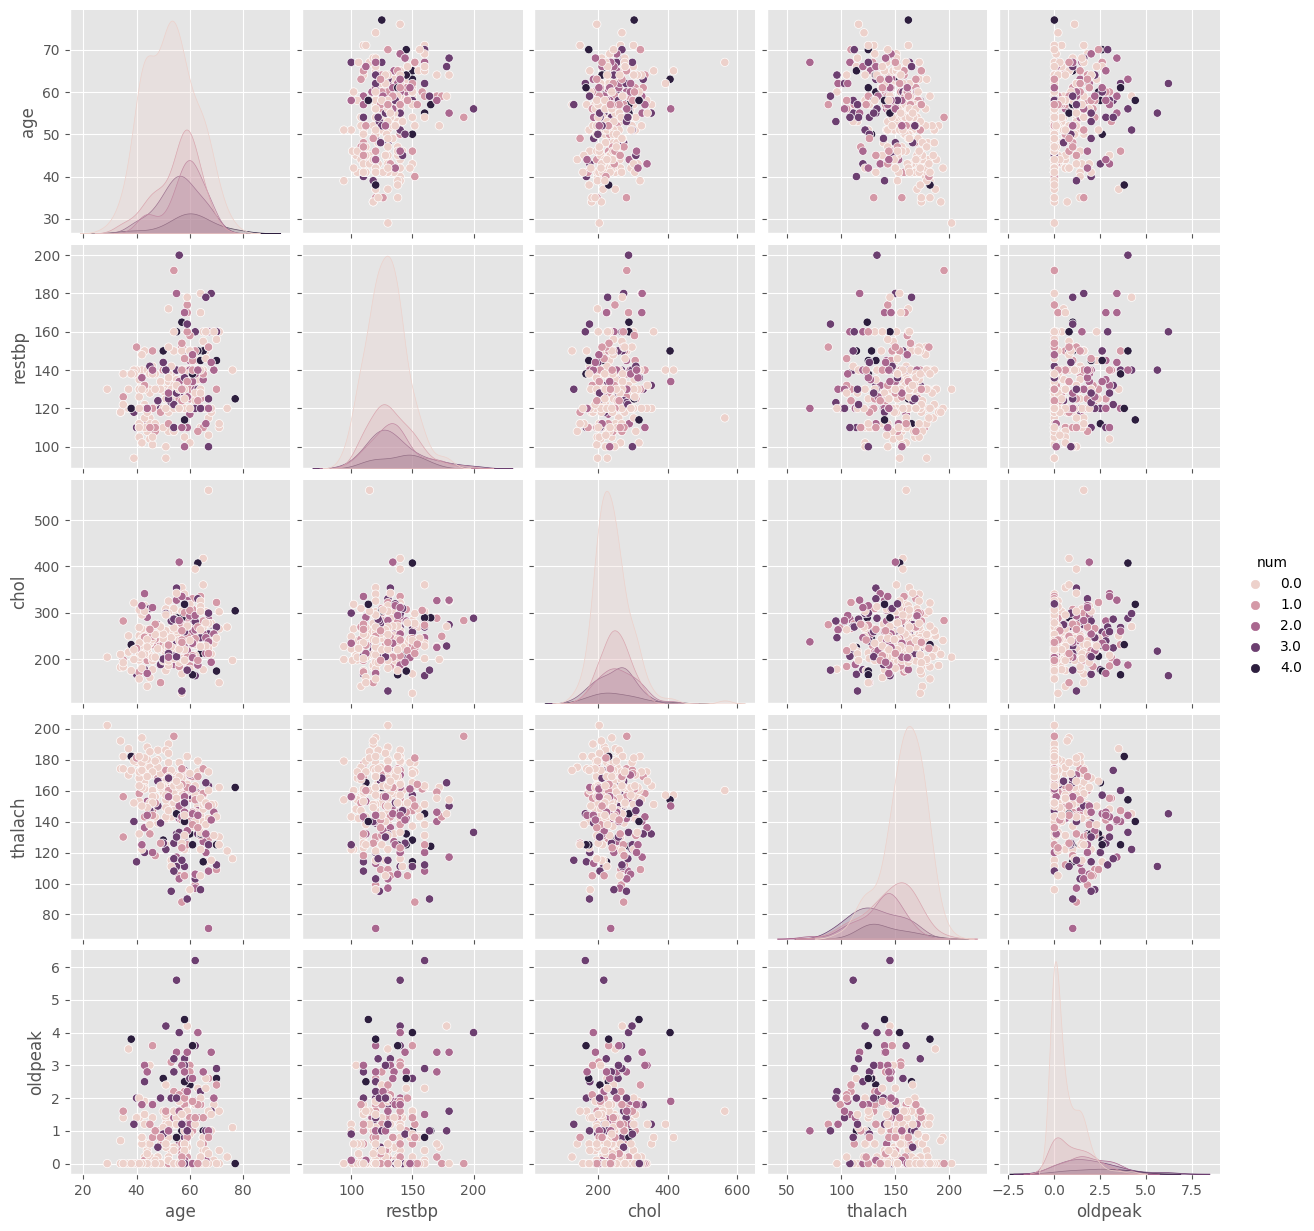

In [43]:
sns.pairplot(data[numer+["num"]], 
        hue="num", diag_kind="kde")

Almost all features look similar to normal distribution. Anomalies can be noted in age and oldpeak of people having diseases 0

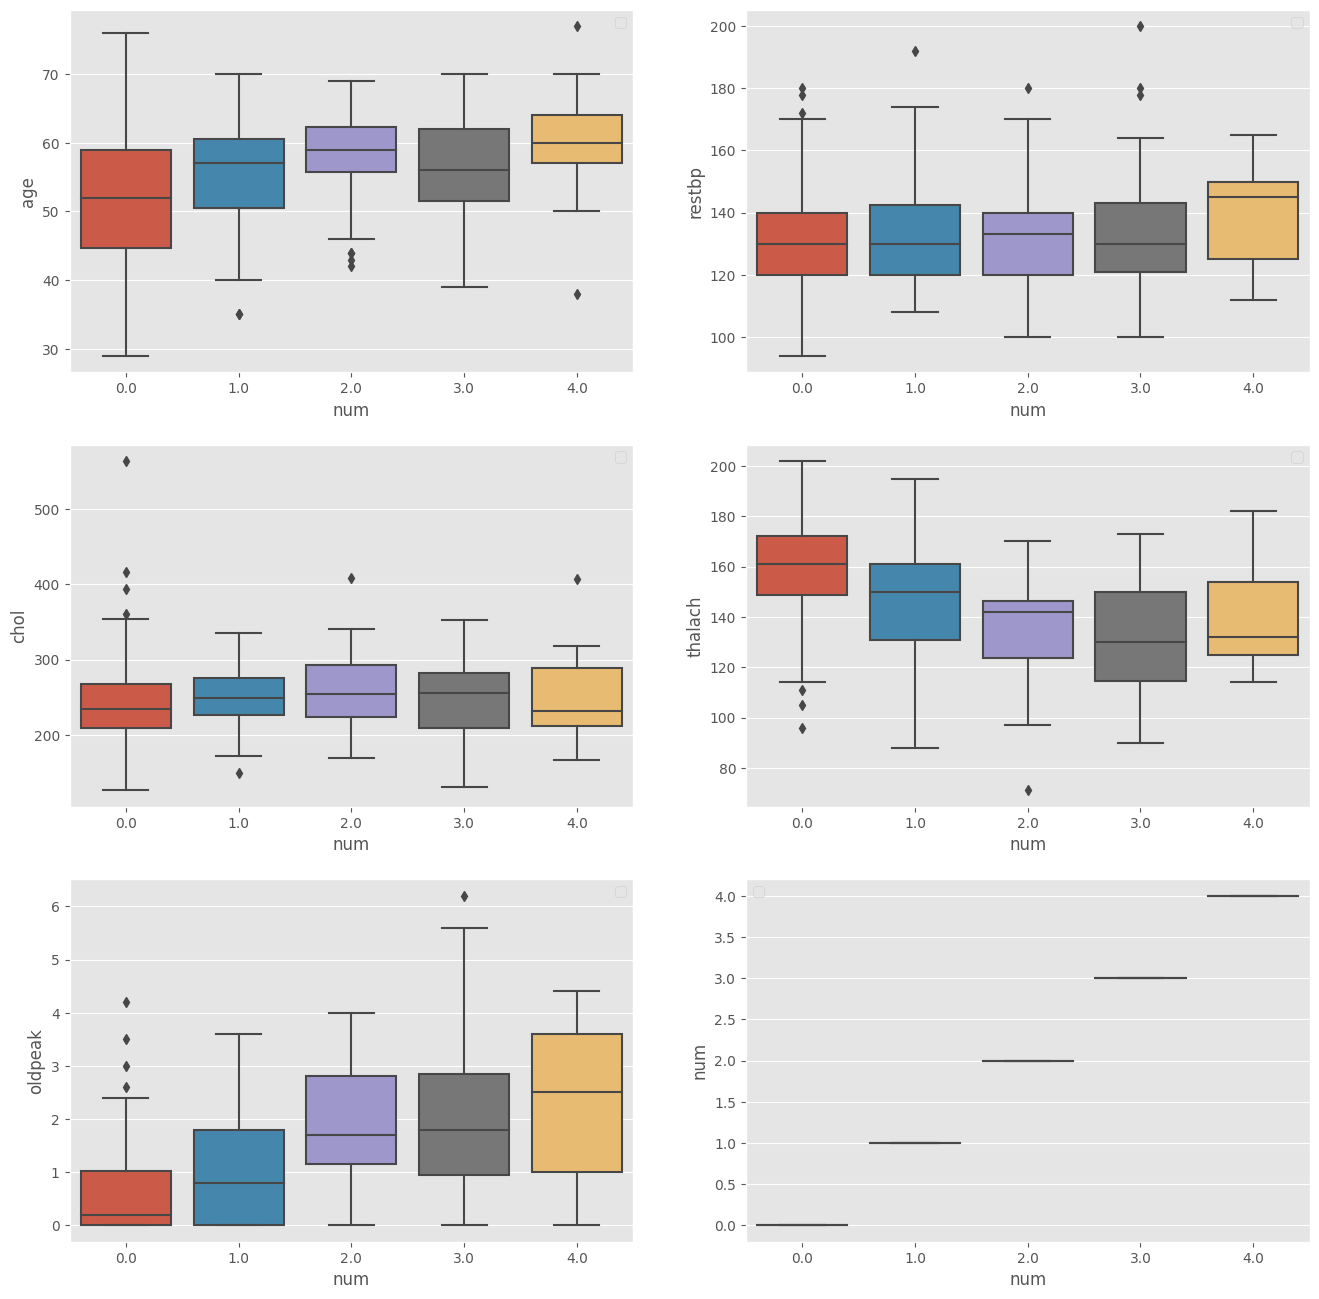

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

for idx, feat in  enumerate(numer+['num']):
    sns.boxplot(x='num', y=feat, data=data, ax=axes[idx // 2, idx % 2])
    axes[idx // 2, idx % 2].legend()
    axes[idx // 2, idx % 2].set_xlabel('num')
    axes[idx // 2, idx % 2].set_ylabel(feat)

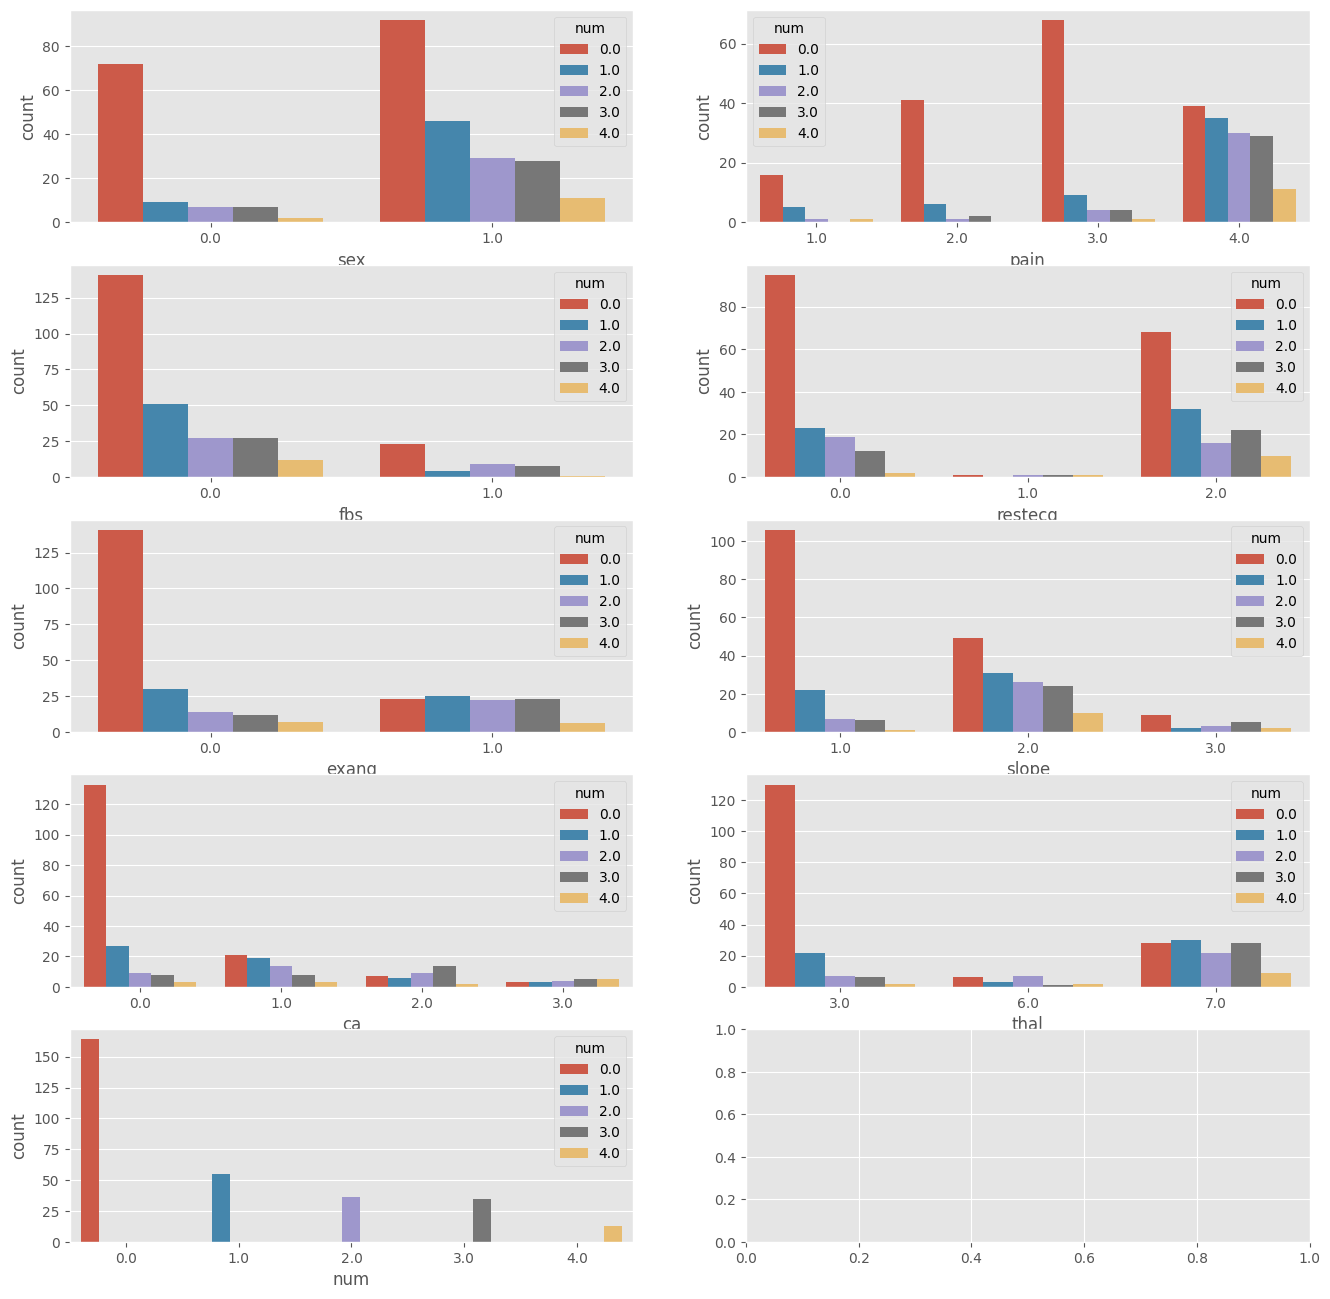

In [45]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 16))

for idx, feat in enumerate(categ):
    sns.countplot(x=feat, hue='num', data=data, ax=axes[idx // 2, idx % 2]);



Conclusions from the graph:

    Males are more often ill in our dataset,

    Asymotimatic pain is equally distributed among classes, other types of pain primarily are reported during disease 0

    Blood sugar is rarely increased

    There is rare ST-T wave abnormality

    Exercise during angina has been more often done for people with diseases 2-4

    The slope of the peak exercise ST segment is usually flat for all diseases except disease 0

    Defect is more often reversable for all diseases except disease 0



In [46]:
y = data['num']
X = data.drop(columns=['num'])

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
%%time
tsne = TSNE(random_state=1)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 3.4 s, sys: 56.6 ms, total: 3.45 s
Wall time: 1.83 s


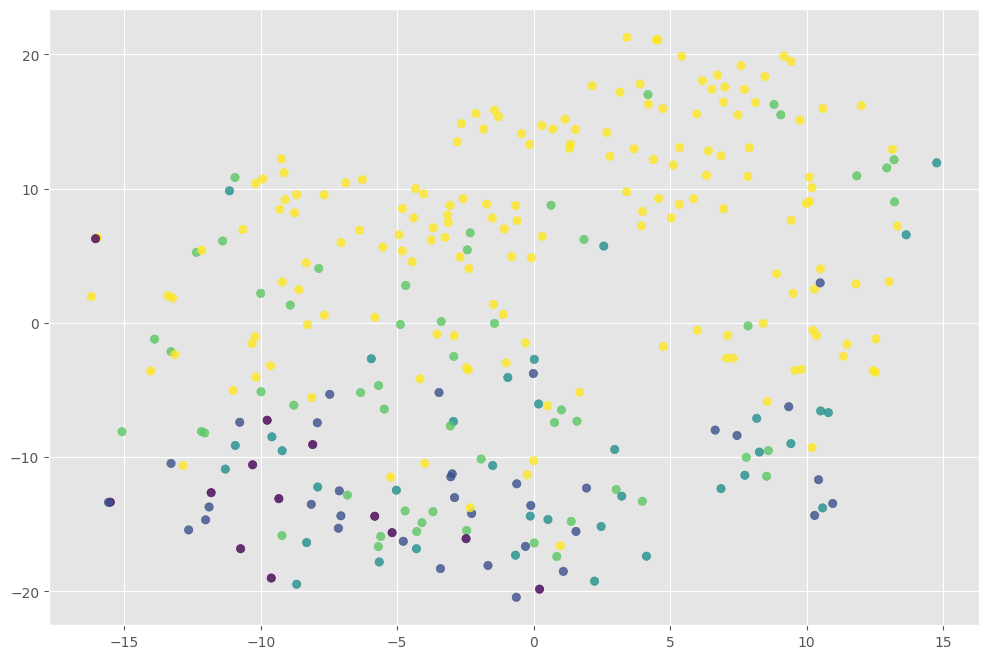

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c = y,  cmap='viridis_r', alpha=.8);



People with disease 0 are seemed to be much easier to separate as a dictinct cluster, and it is difficult to find clusters among other diseases
4. Insights and found dependencies

From the previous EDA we've found that the disease 0 has much more peculiarities, that other diseases from our data. That is why for our case, we should remember about balancing our classes and be rather suspicious considering the results we'll get about diseases 1-4, thus we're going to sove multiclass classification
5. Data preprocessing

Choose categorical variables for using in models


In [50]:
categ2 = ['sex', 'pain', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

Let's apply OneHotEncoding for categorical features and scale numeric features

In [51]:
from sklearn.feature_extraction import DictVectorizer as DV
encoder = DV(sparse = False)
cat_hot_x = encoder.fit_transform(X[categ2].T.to_dict().values())

In [54]:
from sklearn.model_selection import train_test_split

(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(cat_hot_x, 
                                   test_size=0.3, 
                                   random_state=0, stratify = y)

(X_train_num, 
 X_test_num, 
 y_train, y_test) = train_test_split(X[numer], y, 
                                     test_size=0.3, 
                                     random_state=0, stratify = y)

In [56]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()
scaler_train.fit(X_train_num, y_train)

X_train_num_scaled=scaler_train.transform(X_train_num)
X_test_num_scaled=scaler_train.transform(X_test_num)

x_train=np.hstack((X_train_num_scaled,X_train_cat_oh))
x_test=np.hstack((X_test_num_scaled,X_test_cat_oh))


6. Model selection

We are solving multiclass classification problem. The classifiers supported by scikit-learn, which we are going to check here:

- Inherently multiclass:
    -- sklearn.tree.DecisionTreeClassifier
    -- sklearn.neighbors.KNeighborsClassifier
    -- sklearn.ensemble.RandomForestClassifier
    -- sklearn.linear_model.RidgeClassifierCV
- Multiclass as One-Vs-One:
    -- sklearn.svm.SVC
- Multiclass as One-Vs-All:
    -- sklearn.linear_model.LogisticRegression (setting multi_class=”ovr”)


Moreover, let's include XGBoost
7. Metrics selection

We'll also use KFold cross-validation scheme with shuffle. Moreover, we will divide our data into train and test set.

After that we are going to apply default model parameters and then tune them with GridSearch.

As for metrics: in our case it is better to state that people with less dangerous disease 0 are ill with more rare diseases, so that they will go for an extra observation, rather than we won't find more dangerous diseases. So for this case we need less false negatives (we say a person is relatively healthy, while he is not). So we place emphasise on recall. To account for this we can place more weights to recall variable in f1 metric. In Python we can do this by fbeta_score function. We will also include accuracy and ordinary f1 score to see how it differs from our target metric.


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import NuSVC, SVC
import xgboost as xgb
from sklearn.model_selection import KFold

classifier = [RandomForestClassifier(max_depth=4, criterion='entropy'),
              KNeighborsClassifier(n_neighbors=10),
              xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=40, min_child_weight=3),
              RidgeClassifier(random_state=1),
              SVC(random_state=1),
              LogisticRegression(random_state = 0, multi_class='ovr'),
              DecisionTreeClassifier(random_state=1)]

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, fbeta_score
metr = ['accuracy_score', 'roc_auc_score', 'f1_score']

In [61]:
CV = KFold(n_splits=3, shuffle=True, random_state=1)

In [62]:
scoress = []
model_name = []
for model in classifier:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_name.append(model.__class__.__name__) 
    scoress.append(({        
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_score_wei': f1_score(y_test, y_pred,average='weighted'),         
        'f_beta': fbeta_score(y_test, y_pred, beta = 1.5, average='weighted')}))

results = pd.DataFrame(data=scoress, columns=['Algorithm', 'accuracy', 'f1_score_wei', 'f_beta'])
results['Algorithm']=model_name

In [63]:
results

,Algorithm,accuracy,f1_score_wei,f_beta
0,RandomForestClassifier,0.593407,0.503170,0.530341
1,KNeighborsClassifier,0.593407,0.526095,0.549299
2,XGBClassifier,0.538462,0.492577,0.508477
3,RidgeClassifier,0.604396,0.542505,0.562837
4,SVC,0.571429,0.511432,0.532290
5,LogisticRegression,0.604396,0.559789,0.575108
6,DecisionTreeClassifier,0.582418,0.571192,0.574907




Now according to f_beta the best model is DecisionTree. The same is true for f1_score, though the most accurate is Ridge model

Let's tune everything
8. Cross-validation and adjustment of model hyperparameters

In [64]:
param_grid_rand = {'n_jobs' : [1,5,10,15,20],
              'max_depth' : [5,7,10,15],
              'criterion' : ['gini', 'entropy']}
param_grid_knn = {'n_neighbors':[2,5,10,15],
                  'weights':['uniform', 'distance'],
                  'p': [1, 2]}
param_grid_log = {'penalty' : ['l1', 'l2'],
                  'C' : [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
param_grid_xgb = {'max_depth' :[2,5,7,10],
                 'learning_rate' : [0.01, 0,1, 1],
                 'gamma' : [0.01, 0.1],
                 'n_estimators' : [20, 30, 40, 50] }

param_grid_ridge = {'alpha' : [0.001, 0.01, 0,1, 1]}
param_grid_svc = {'kernel': ['linear', 'poly', 'rbf'],
                 'degree': [2, 3] ,
                 'decision_function_shape': ['ovo', 'ovr']}

param_grid_tree = {'max_depth' : [3,4,5,7, 10],
                   'min_samples_split' :[2,3,5],
                   'max_features' :['auto', None]}
param_grid = [param_grid_rand, param_grid_knn, param_grid_xgb,param_grid_ridge,  
              param_grid_svc, param_grid_log, 
              param_grid_tree]

In [67]:
%%time
scores2 = []
model_name = []
for i in enumerate(classifier):
    grid_cv = GridSearchCV(classifier[i[0]], param_grid[i[0]],  cv = 3)
    grid = grid_cv.fit(x_train, y_train.values)
    print(classifier[i[0]], grid_cv.best_params_)
    pred = grid_cv.best_estimator_.predict(x_test)#[:,1]
    model_name.append(classifier[i[0]].__class__.__name__) 
    scores2.append(({        
        'accuracy': accuracy_score(y_test, pred),
        'f1_score_wei': f1_score(y_test, pred, average='weighted'),
        'f_beta': fbeta_score(y_test, pred, beta = 1.5, average='weighted')}))

results2 = pd.DataFrame(data=scores2, columns=['Algorithm', 'f1_score_wei', 'accuracy', 'f_beta'])
results2['Algorithm']=model_name

RandomForestClassifier(criterion='entropy', max_depth=4) {'criterion': 'entropy', 'max_depth': 5, 'n_jobs': 10}
KNeighborsClassifier(n_neighbors=10) {'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...) {'gamma': 0.01, 'learning_rate': 0, 'max_depth'

In [68]:
results2

,Algorithm,f1_score_wei,accuracy,f_beta
0,RandomForestClassifier,0.556537,0.626374,0.577587
1,KNeighborsClassifier,0.527344,0.593407,0.550025
2,XGBClassifier,0.376923,0.538462,0.426087
3,RidgeClassifier,0.542505,0.604396,0.562837
4,SVC,0.527731,0.582418,0.546909
5,LogisticRegression,0.551961,0.593407,0.566357
6,DecisionTreeClassifier,0.524253,0.560440,0.533716


Let's plot all metrics for tuned models

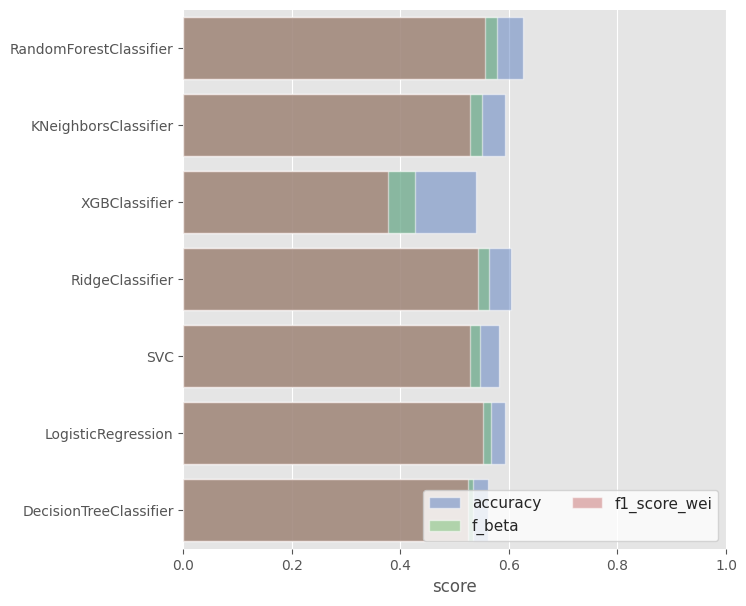

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 7))
sns.set(style="whitegrid")

sns.set_color_codes("muted")
sns.barplot(x="accuracy",y = 'Algorithm', data=results2,
            label="accuracy", color="b", alpha= 0.5)

sns.barplot(x="f_beta",y = 'Algorithm', data=results2,
            label="f_beta", color="g", alpha= 0.5)

sns.barplot(x="f1_score_wei", y = 'Algorithm',  data=results2,
            label="f1_score_wei", color="r", alpha = 0.5)


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="score")
sns.despine(left=True, bottom=True)



As we can see the best perfomed model is SVC with parameters {'decision_function_shape': 'ovo', 'degree': 2, 'kernel': 'linear'}
9. Prediction for test or hold-out samples

Here is the prediction of the best model



In [70]:
estimator=SVC(decision_function_shape = 'ovo', degree = 2, kernel='linear')
estimator.fit(x_train, y_train)
pred_new = estimator.predict(x_test)
fbeta_score(y_test, pred_new, beta = 1.5, average='weighted')

0.6071720892514498

In [71]:
pred_new

array([1., 1., 3., 0., 4., 1., 2., 1., 0., 1., 0., 1., 0., 0., 1., 0., 3.,
       1., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       3., 1., 3., 1., 0., 2., 0., 0., 0., 0., 0., 0., 3., 0., 0., 2., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 1.,
       0., 0., 0., 0., 0., 3., 0., 0., 1., 0., 0., 0., 0., 3., 0., 0., 1.,
       1., 1., 0., 3., 1., 0.])


10. Plotting training and validation curves

Let's take pur best model and look at learning curves


In [72]:
%%time

RANDOM_SEED = 0
train_sizes, train_scores, test_scores = learning_curve(estimator=SVC(decision_function_shape = 'ovo', 
                                                                      degree = 2, kernel='linear'),
                                                        X=x_train, 
                                                        y=y_train,
                                                        train_sizes=[0.25, 0.5, 0.75, 1.0],
                                                        cv=CV,
                                                        shuffle=True,
                                                        random_state=RANDOM_SEED)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(20, 5))

plt.xlabel('train_sizes')
plt.ylabel('roc_auc')
# plt.ylim(0.5, 1.01)

plt.plot(train_sizes,
             train_scores_mean,
             label="Training score",
             color="b", marker='o')

plt.plot(train_sizes,
             test_scores_mean, 
             label="CV score",
             color="g", marker='s')

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, color="b")

plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")


plt.legend(loc="best")
plt.show()

NameError: ignored

The good news: curves are coming closer to each other. The bad news: nothing happens to CV score. Maybe this model requires specific CV scheme

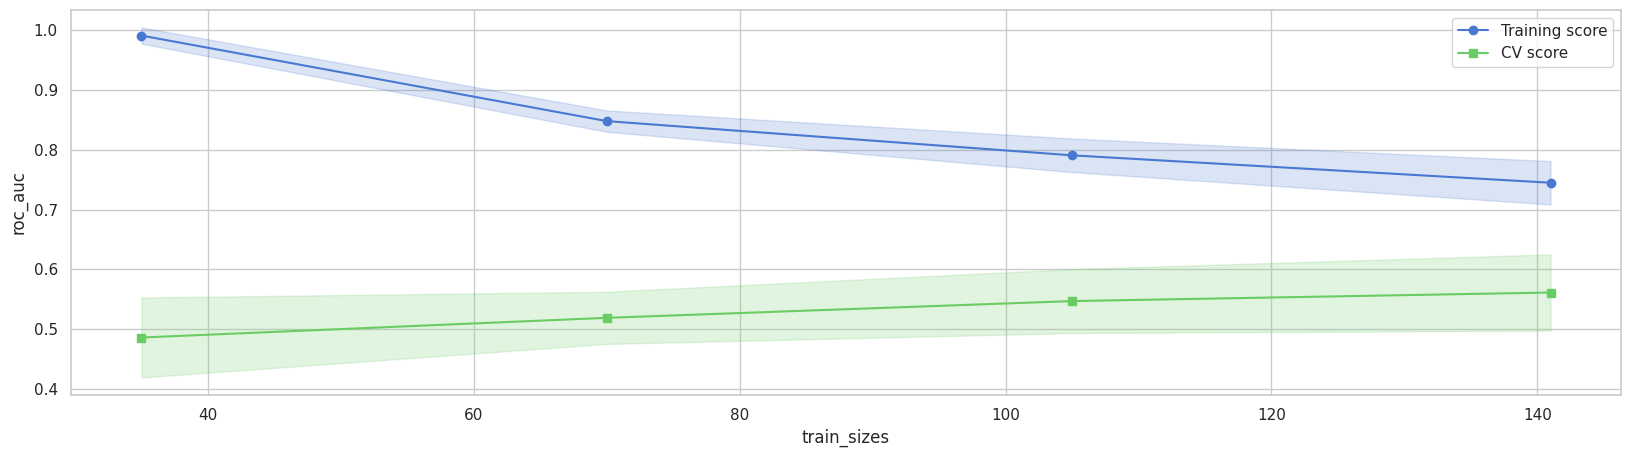

In [74]:
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import learning_curve  

CV2 = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
RANDOM_SEED = 0
train_sizes, train_scores, test_scores = learning_curve(estimator=SVC(decision_function_shape = 'ovo', 
                                                                      degree = 2, kernel='linear'),
                                                        X=x_train, 
                                                        y=y_train,
                                                        train_sizes=[0.25, 0.5, 0.75, 1.0],
                                                        cv=CV2,
                                                        shuffle=True,
                                                        random_state=RANDOM_SEED)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(20, 5))

plt.xlabel('train_sizes')
plt.ylabel('roc_auc')
# plt.ylim(0.5, 1.01)

plt.plot(train_sizes,
             train_scores_mean,
             label="Training score",
             color="b", marker='o')

plt.plot(train_sizes,
             test_scores_mean, 
             label="CV score",
             color="g", marker='s')

plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, color="b")

plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")


plt.legend(loc="best")
plt.show()



Yes, with stratified KFold the situation is better
11. Creation of new features and description of this process

Can we improve model by creating new features? Here data contain more categorical variables. In such situation let's generate new features by cross interaction of existing ones.


In [75]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
data_poly_train = poly.fit_transform(x_train)
data_poly_test = poly.transform(x_test)

scaler = StandardScaler()
data_poly_scaled_train = scaler.fit_transform(data_poly_train)
data_poly_scaled_test = scaler.transform(data_poly_test)

In [76]:
x_train_new=np.hstack((x_train, data_poly_scaled_train))
x_test_new=np.hstack((x_test, data_poly_scaled_test))

In [77]:
x_train.shape, data_poly_scaled_train.shape, x_train_new.shape

((212, 13), (212, 91), (212, 104))

In [78]:
estimator=SVC(decision_function_shape = 'ovo', degree = 2, kernel='linear')
estimator.fit(x_train_new, y_train)
pred_new = estimator.predict(x_test_new)
fbeta_score(y_test, pred_new, beta = 1.5, average='weighted')

0.49599892029963644


12. Conclusions

We have tried 7 different algorithm for multiclass classification task. As we can see to distinguish between diseases is more difficult than to cathc whether the person have any disease. In our analysis the best performed model turned out to be SVC.

As for ways of improvement, we can see from learning curves that there is need for more data. Moreover, more features considering heart can be included in the dataset, that could help to build more sophisticated algorithms.

Case for application of such approach are obvious: it is automatification of patients observation and helping doctors in diagnosis clearification.

Hope you've found this project interesting, as I did. (^_^)
